In [3]:
#  step through years and visualize in PCA space

import mysql.connector as mysql
import pickle
import json

import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'

import time

In [4]:
top_level_path = '/project2/jevans/brendan/pubmed_data_processing/year_pmids/'
pubs_dir = top_level_path + 'publication_embeddings/'
cites_dir = top_level_path + 'citation_embeddings/'



### prefit pca model (todo generate more and place them at /project2/...)

In [5]:
pca_path = 'develop_samples/pca_model1.pkl'  # more located at /project2...
with open(pca_path, 'rb') as file:
    pca_model = pickle.load(file)

## helper function

In [6]:
# simplified version - for one year
def plot_pubs_and_cites(): 
    (f, ax) = plt.subplots(1,
                       2,
                       sharex='all', sharey='all',
                       figsize=(10,4))

    sns.kdeplot(pub_data['embeddings'][:,0], # these are pca'd
                pub_data['embeddings'][:,1],
                ax=ax[0],
                shade=True,
                cmap='Blues')
    ax[0].set_title('published: year {}'.format(year))


    sns.kdeplot(cite_data['embeddings'][:,0],
                cite_data['embeddings'][:,1],
                ax=ax[1],
                shade=True,
                cmap='Reds')
    ax[1].set_title('cited: {}'.format(year))

    plt.savefig('yearsteps/publications and citations prototype {} - {}.png'.format(start_year, end_year))
    plt.savefig('yearsteps/publications and citations prototype {} - {}.svg'.format(start_year, end_year))
    plt.show()



# old version - for multiple years
'''
def plot_pubs_and_cites_multiyear(start_year, end_year): 
    (f, ax) = plt.subplots(end_year - start_year + 1,
                       2,
                       sharex='all', sharey='all',
                       figsize=(4,12))

    for i_year, year in enumerate(range(start_year, end_year+1)):

        print(i_year, year)

        sns.kdeplot(pub_data['embeddings'][:,0], # these are pca'd
                    pub_data['embeddings'][:,1],
                    ax=ax[i_year,0],
                    shade=True,
                    cmap='Blues')
        ax[i_year,0].set_title('published: year {}'.format(year))


        sns.kdeplot(cite_data['embeddings'][:,0],
                    cite_data['embeddings'][:,1],
                    ax=ax[i_year,1],
                    shade=True,
                    cmap='Reds')
        ax[i_year,1].set_title('cited: {}'.format(year))

    plt.savefig('yearsteps/publications and citations prototype {} - {}.png'.format(start_year, end_year))
    plt.savefig('yearsteps/publications and citations prototype {} - {}.svg'.format(start_year, end_year))
    plt.show()
'''

"\ndef plot_pubs_and_cites_multiyear(start_year, end_year): \n    (f, ax) = plt.subplots(end_year - start_year + 1,\n                       2,\n                       sharex='all', sharey='all',\n                       figsize=(4,12))\n\n    for i_year, year in enumerate(range(start_year, end_year+1)):\n\n        print(i_year, year)\n\n        sns.kdeplot(pub_data['embeddings'][:,0], # these are pca'd\n                    pub_data['embeddings'][:,1],\n                    ax=ax[i_year,0],\n                    shade=True,\n                    cmap='Blues')\n        ax[i_year,0].set_title('published: year {}'.format(year))\n\n\n        sns.kdeplot(cite_data['embeddings'][:,0],\n                    cite_data['embeddings'][:,1],\n                    ax=ax[i_year,1],\n                    shade=True,\n                    cmap='Reds')\n        ax[i_year,1].set_title('cited: {}'.format(year))\n\n    plt.savefig('yearsteps/publications and citations prototype {} - {}.png'.format(start_year, end_

# plot year state

1965


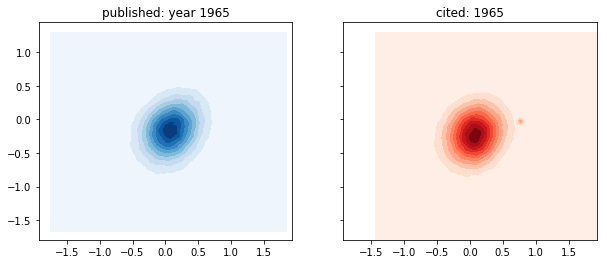

1966


KeyboardInterrupt: 

In [10]:
start_year = 1965
end_year = 1966

for year in range(start_year, end_year+1):
    print(year)
    
    pubs_path = pubs_dir + str(year) + '.json'
    cites_path = cites_dir + str(year) + '.json'
    
    with open(pubs_path, 'r') as f:
        pub_data = json.load(f)   
    pub_data['embeddings'] = np.array(pub_data['embeddings'])
    #print(np.shape(pub_data['embeddings']))
    
    
    with open(cites_path, 'r') as f:
        cite_data = json.load(f)
    cite_data['embeddings'] = np.array(cite_data['embeddings'])
    
    plot_pubs_and_cites()
    